# Visualizing statistics

---  

# Objective of this notebook
* Compare the performance of the 4 image classification models i.e. 3 different transfer learning algorithms and CNN model from scratch which were created in previous notebooks.
* Plot and visualize different charts to compare the results which help to determine the best model.

---
## 1. Prerequisites

### Importing packages & modules

In [1]:
# Common modules/packages
import matplotlib.pyplot as plt
import math
import numpy as np
import pathlib
import warnings

# PyTorch modules/packages
import torch

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive folder
from google.colab import drive
drive.mount('/content/drive')
# change current directory after mounting
PROJ_DIR = '/content/drive/MyDrive/art-classifier'
%cd $PROJ_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/art-classifier


### Setting up the training mode based on CUDA capability

In [3]:
device = 'cpu'  # sets the default value
train_on_gpu = torch.cuda.is_available()  # returns True if CUDA enabled GPU is available

if train_on_gpu == True :
    print('CUDA is available!  Training on GPU ...')
    print('\n')
    print(torch.cuda.get_device_properties(0))
    device = 'cuda'

CUDA is available!  Training on GPU ...


_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


### Define some utilities functions

In [4]:
# Retrieves the list of files with a directory
def getFilesInDirectory(pathToDir, extension = "*.*"):
    if not isinstance(pathToDir, pathlib.PurePath):
        pathToDir = pathlib.Path(pathToDir)

    return list(pathToDir.glob(extension))

# Retrieves the list of folders with a directory
def getFoldersInDirectory(pathToDir, prefix = ""):
    if not isinstance(pathToDir, pathlib.PurePath):
        pathToDir = pathlib.Path(pathToDir)

    return sorted([fld for fld in pathToDir.iterdir() if fld.is_dir() and not fld.name.lower().startswith(prefix)])

# Retrieves the list of folders with a directory
def getFolderNamesInDirectory(pathToDir, prefix = ""):
    if not isinstance(pathToDir, pathlib.PurePath):
        pathToDir = pathlib.Path(pathToDir)

    return sorted([fld.name for fld in pathToDir.iterdir() if fld.is_dir() and not fld.name.lower().startswith(prefix)])

### List the categories

In [5]:
# sets the root folder for image sets
pathToDataset = pathlib.Path.cwd().joinpath('Dataset')
pathToTrain = pathToDataset.joinpath('train')

# Count and list art category
artCategories = getFolderNamesInDirectory(pathToTrain, ".")  #collects the list of folders
print("Total no. of categories = ", len(artCategories))  #displays the number of classes (= Art categories)
print("Categories: ", artCategories)  #displays the list of classes

Total no. of categories =  6
Categories:  ['cubism', 'genre', 'landscape', 'portrait', 'still-life', 'surrealism']


## Preparing the metrics

* Retrieve for each model previously saved the performance metrics saved during the previous milestones. These metrics were saved as **checkpoint**

In [6]:
# Defining checkpoints
checkpoints = []
model_names = []

# For each files within the model folder
files = getFilesInDirectory(pathlib.Path.cwd().joinpath('models'), '*.pt')    #lists all the 'jpg' images in the folder
for file in files:
    # Extracting the model name
    model_names.append(file.name[8:len(file.name)-3])
    # Add to checkpoint library
    checkpoints.append(torch.load(file))

print(f'{len(model_names)} models found')

4 models found


For each checkpoints, display the metrics. The metrics should be the same for all the models.

In [7]:
checkpoint_counter = 1
for checkpoint in checkpoints:
    print(f'Model {checkpoint_counter}:')
    for metric in checkpoint:
        print(metric)
    checkpoint_counter += 1

#-------------------------------------------------------------------------#
#------  Make sure that the statistics are the same for each model  ------#
#-------------------------------------------------------------------------#

Model 1:
dict_keys(['training_losses', 'valid_losses', 'accuracies', 'classes_accuracies', 'state_dict'])
Model 2:
dict_keys(['training_losses', 'valid_losses', 'accuracies', 'classes_accuracies', 'state_dict'])
Model 3:
dict_keys(['training_losses', 'valid_losses', 'accuracies', 'classes_accuracies', 'state_dict'])
Model 4:
dict_keys(['training_losses', 'valid_losses', 'accuracies', 'classes_accuracies', 'state_dict'])


## Collect  the performance metrics

The following metrics were previously saved within a checkpoint:
* Training loss over each epoch
* Validation loss over each epoch
* Accuracy over each epoch
* Class accuracy (testing)
* Number of epochs

These metrics will be represented through several plots. The coordinates in the X axis will be represented by the number of Epoch.

In [8]:
# Number of epochs to consider
max_numEpoch = 40

# Collecting statistics
accuracies = []
classes_accuracies = []
num_epochs = []
training_losses = []
valid_losses = []

# Going through the collection of checkpoints
for checkpoint in checkpoints:
    training_losses.append(checkpoint['training_losses'][:max_numEpoch])
    valid_losses.append(checkpoint['valid_losses'][:max_numEpoch])
    accuracies.append(checkpoint['accuracies'][:max_numEpoch])
    classes_accuracies.append(checkpoint['classes_accuracies'][:len(artCategories)])
    num_epochs.append(len(checkpoint['training_losses']))

epochs = list(range(1, max_numEpoch + 1, 1))
#----------------------------------------------------------------------------------------------------------------------#
#------  Note that `state_dict` is the trained model and is of no use while plotting and visualizing statistics  ------#
#----------------------------------------------------------------------------------------------------------------------#

## Plotting - Learning Curves

A learning curve is a plot of model learning performance over experience or time (= epoch). Each model has been evaluated against a training dataset and a validation dataset.

Learning curves can facilitate the diagnosis of problems with learning, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative.

### Training & Validation Loss per model
The train Learning Curve shows of how well the model is learning. The validation Learning Curve shows how well the model is generalizing.

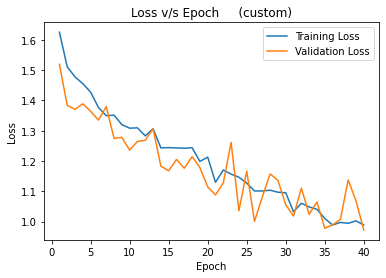

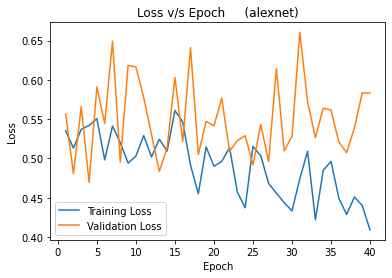

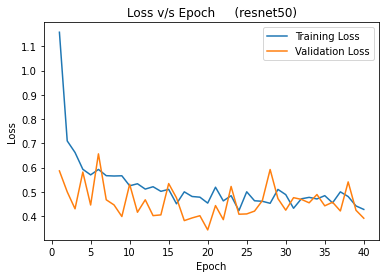

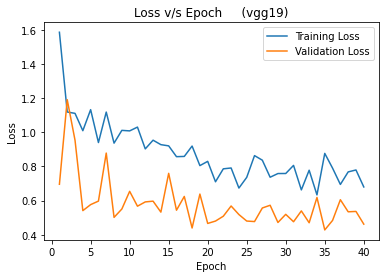

In [9]:
# Going through the collection of checkpoints
for i in range(len(model_names)):
    x = epochs
    y = training_losses[i]
    z = valid_losses[i]
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss v/s Epoch' + '     (' + model_names[i] + ')')
    plt.plot(x, y, label='Training Loss')
    plt.plot(x, z, label='Validation Loss')
    plt.legend()
    plt.show()

### Compare Training Loss for all models
In order to evaluate which model learns best, create one graph for all the models for the train learning curve only.

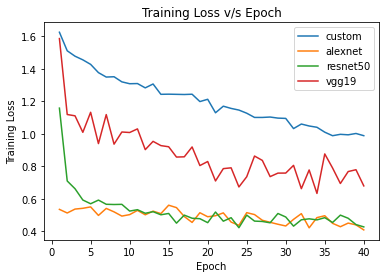

In [10]:
# Setting coordinates
x = epochs
ys = []
for i in range(len(model_names)):
    ys.append(training_losses[i])

# Plotting
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss v/s Epoch')

for i in range(len(model_names)):
    plt.plot(x, ys[i], label=model_names[i])

plt.legend()
plt.show()

### Compare Validation Loss for all models
In order to evaluate which model generalizes best, create one graph for all the models for the validation learning curve only.

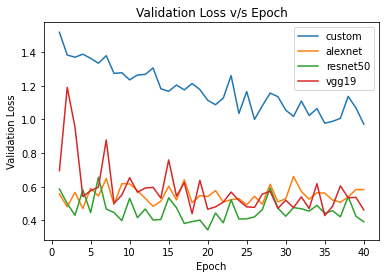

In [11]:
# Setting coordinates
x = epochs
ys = []
for i in range(len(model_names)):
    ys.append(valid_losses[i])

# Plotting
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss v/s Epoch')

for i in range(len(model_names)):
    plt.plot(x, ys[i], label=model_names[i])

plt.legend()
plt.show()

### Compare Accuracy Loss for all models
In order to evaluate which model performs best, create one graph for all the models for the performance learning curve only.

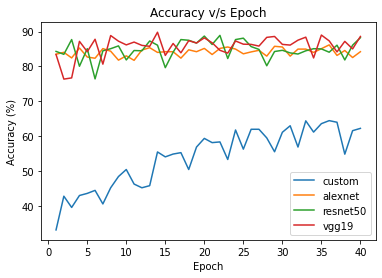

In [12]:
# Setting coordinates
x = epochs
ys = []
for i in range(len(model_names)):
    ys.append(accuracies[i])

# Plotting
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy v/s Epoch')

for i in range(len(model_names)):
    plt.plot(x, ys[i], label=model_names[i])

plt.legend()
plt.show()

### Compare Accuracy Loss per art category
In order to evaluate which model performs best per category, for each model, create one graph for all the categories for the performance learning curve only.

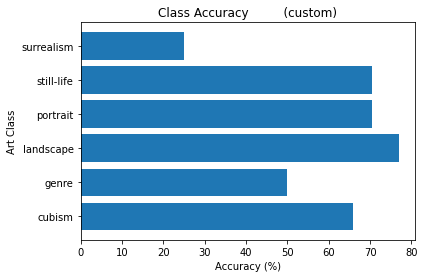

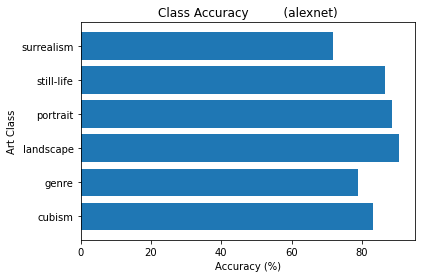

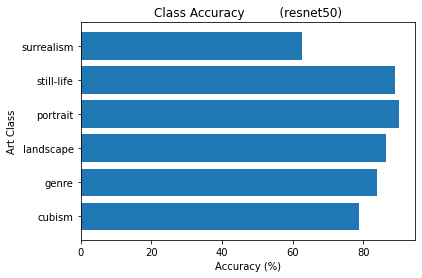

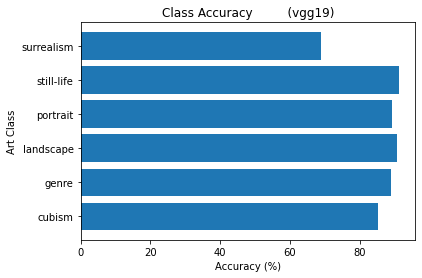

In [13]:
for i in range(len(model_names)):
    plt.barh(artCategories,classes_accuracies[i],align = 'center')
    plt.xlabel('Accuracy (%)')
    plt.ylabel('Art Class')
    plt.title('Class Accuracy' + '         (' + model_names[i] +')')
    plt.show()

---
## Data visualization

Create one graph for all the categories (x-Axis) showing the performance of each model.

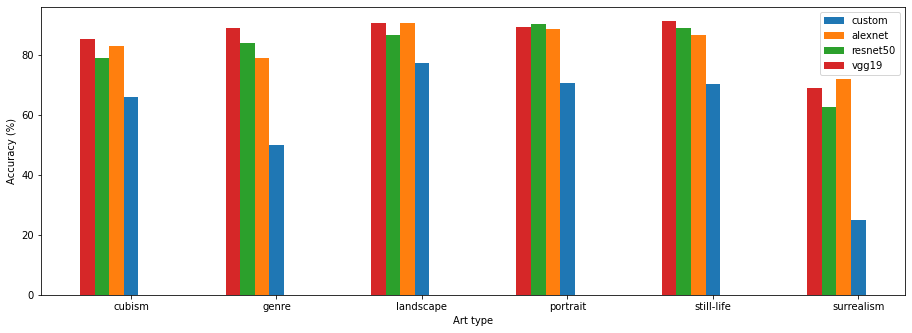

In [18]:
data = []

for i in range(len(model_names)):
    data.append(classes_accuracies[i])
    
X = np.arange(1,len(artCategories)+1,1)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])

for i in range(len(data)):
    ax.bar(X, data[i], width=0.1, label=model_names[i])
    X = X - 0.1

plt.xlabel('Art type') 
plt.ylabel('Accuracy (%)')
plt.legend()
plt.xticks(np.arange(1,len(artCategories)+1,1), artCategories)
plt.show()